## 필수과제2
- 이진분류 데이터 이용 DT를 통해 시각화에 대한 인사이트와 하이퍼파라미터에 대한 인사이트 등을 정리
- 필수과제 1과 같이 동일하게 정리해서 요약하기(전처리는 필수)

# 데이터 불러오기 및 결측치 확인

In [99]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv("creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [100]:
# 결측치 개수 확인
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [101]:
# 데이터 정보 확인
data.info()
# 284807개의 non-null data로 구성되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 데이터 이상치 확인

## V1~V28

<Axes: >

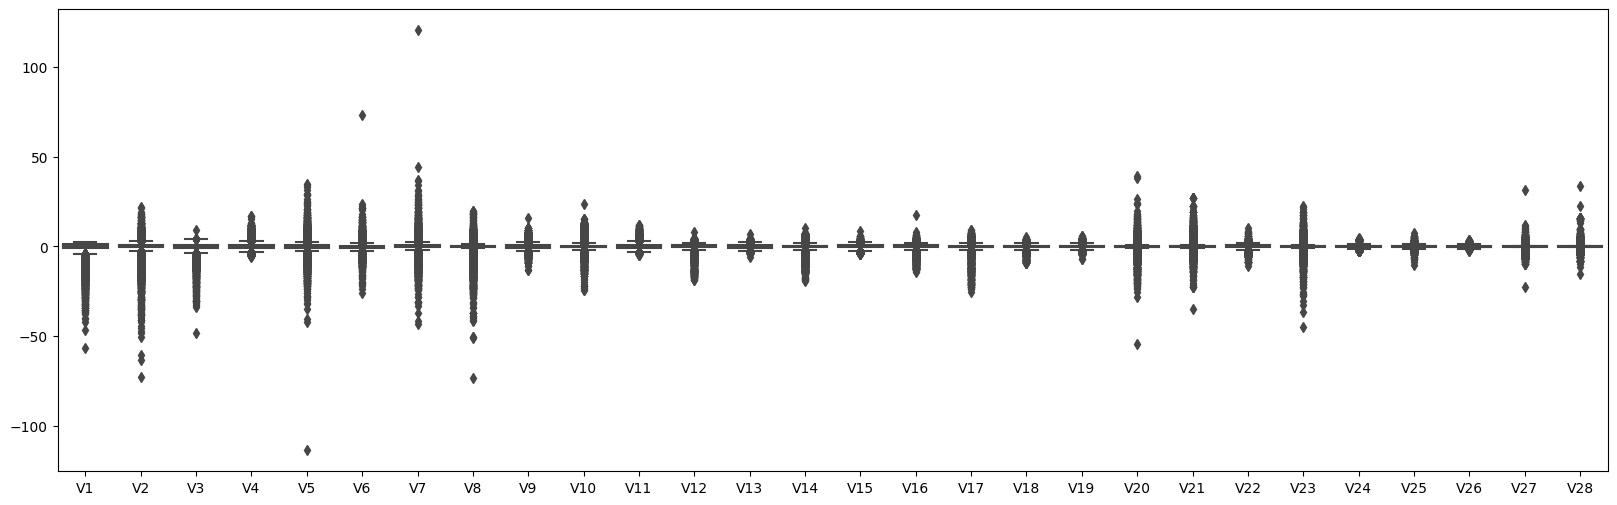

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
sns.boxplot(data.loc[:,["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
                        "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
                        "V21","V22","V23","V24","V25","V26","V27","V28"]])

In [103]:
import numpy as np
def outlier_iqr(data, column):

    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]

    # 이상치 총 개수 구하기
    return  data1.shape[0] + data2.shape[0]

In [104]:
# 이상치의 개수 및 전체에서의 비율 확인하기
columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
           "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
           "V21","V22","V23","V24","V25","V26","V27","V28"]
total = 0
for i in columns:
  total += outlier_iqr(data,i)
  print(i,"이상치 개수", outlier_iqr(data,i), "/",i, "이상치 비율", str(outlier_iqr(data,i)/len(data)*100)+"%")

V1 이상치 개수 7062 / V1 이상치 비율 2.4795738868777804%
V2 이상치 개수 13526 / V2 이상치 비율 4.7491810243428%
V3 이상치 개수 3363 / V3 이상치 비율 1.1807996292225964%
V4 이상치 개수 11148 / V4 이상치 비율 3.9142296362097846%
V5 이상치 개수 12295 / V5 이상치 비율 4.316958501722219%
V6 이상치 개수 22965 / V6 이상치 비율 8.063355184388024%
V7 이상치 개수 8948 / V7 이상치 비율 3.1417767119487934%
V8 이상치 개수 24134 / V8 이상치 비율 8.47380857914307%
V9 이상치 개수 8283 / V9 이상치 비율 2.9082852598426303%
V10 이상치 개수 9496 / V10 이상치 비율 3.334187713082895%
V11 이상치 개수 780 / V11 이상치 비율 0.27386967314707855%
V12 이상치 개수 15348 / V12 이상치 비율 5.3889124916171305%
V13 이상치 개수 3368 / V13 이상치 비율 1.182555204050462%
V14 이상치 개수 14149 / V14 이상치 비율 4.96792564789489%
V15 이상치 개수 2894 / V15 이상치 비율 1.0161267103687759%
V16 이상치 개수 8184 / V16 이상치 비율 2.873524878250886%
V17 이상치 개수 7420 / V17 이상치 비율 2.605273044552978%
V18 이상치 개수 7533 / V18 이상치 비율 2.644949035662747%
V19 이상치 개수 10205 / V19 이상치 비율 3.5831282236742776%
V20 이상치 개수 27770 / V20 이상치 비율 9.750462593967143%
V21 이상치 개수 14497 / V21 이상치 비율 5.090113655914

In [105]:
# IQR
Q1 = data[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
           "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
           "V21","V22","V23","V24","V25","V26","V27","V28"]].quantile(q=0.25)
Q3 = data[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
           "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
           "V21","V22","V23","V24","V25","V26","V27","V28"]].quantile(q=0.75)
IQR = Q3-Q1
IQR

V1     2.236015
V2     1.402274
V3     1.917560
V4     1.591981
V5     1.303524
V6     1.166861
V7     1.124512
V8     0.535976
V9     1.240237
V10    0.989349
V11    1.502088
V12    1.023810
V13    1.311044
V14    0.918724
V15    1.231705
V16    0.991333
V17    0.883423
V18    0.999657
V19    0.915248
V20    0.344762
V21    0.414772
V22    1.070904
V23    0.309488
V24    0.794113
V25    0.667861
V26    0.567936
V27    0.161885
V28    0.131240
dtype: float64

In [106]:
# 전체 이상치 개수가 크게 영향을 주지 않은 개수로 보이므로 제거
print("총 이상치 개수", total, "/", "총 이상치 비율", str(total/(len(data)*28)*100)+"%")

총 이상치 개수 338468 / 총 이상치 비율 4.244327863129367%


In [107]:
# 이상치 제거
IQR_df = data[(data['V1'] <= Q3['V1']+1.5*IQR['V1']) & (data['V1'] >= Q1['V1']-1.5*IQR['V1'])]
IQR_df = IQR_df[(IQR_df['V2'] <= Q3['V2']+1.5*IQR['V2']) & (IQR_df['V2'] >= Q1['V2']-1.5*IQR['V2'])]
IQR_df = IQR_df[(IQR_df['V3'] <= Q3['V3']+1.5*IQR['V3']) & (IQR_df['V3'] >= Q1['V3']-1.5*IQR['V3'])]
IQR_df = IQR_df[(IQR_df['V4'] <= Q3['V4']+1.5*IQR['V4']) & (IQR_df['V4'] >= Q1['V4']-1.5*IQR['V4'])]
IQR_df = IQR_df[(IQR_df['V5'] <= Q3['V5']+1.5*IQR['V5']) & (IQR_df['V5'] >= Q1['V5']-1.5*IQR['V5'])]
IQR_df = IQR_df[(IQR_df['V6'] <= Q3['V6']+1.5*IQR['V6']) & (IQR_df['V6'] >= Q1['V6']-1.5*IQR['V6'])]
IQR_df = IQR_df[(IQR_df['V7'] <= Q3['V7']+1.5*IQR['V7']) & (IQR_df['V7'] >= Q1['V7']-1.5*IQR['V7'])]
IQR_df = IQR_df[(IQR_df['V8'] <= Q3['V8']+1.5*IQR['V8']) & (IQR_df['V8'] >= Q1['V8']-1.5*IQR['V8'])]
IQR_df = IQR_df[(IQR_df['V9'] <= Q3['V9']+1.5*IQR['V9']) & (IQR_df['V9'] >= Q1['V9']-1.5*IQR['V9'])]
IQR_df = IQR_df[(IQR_df['V10'] <= Q3['V10']+1.5*IQR['V10']) & (IQR_df['V10'] >= Q1['V10']-1.5*IQR['V10'])]
IQR_df = IQR_df[(IQR_df['V11'] <= Q3['V11']+1.5*IQR['V11']) & (IQR_df['V11'] >= Q1['V11']-1.5*IQR['V11'])]
IQR_df = IQR_df[(IQR_df['V12'] <= Q3['V12']+1.5*IQR['V12']) & (IQR_df['V12'] >= Q1['V12']-1.5*IQR['V12'])]
IQR_df = IQR_df[(IQR_df['V13'] <= Q3['V13']+1.5*IQR['V13']) & (IQR_df['V13'] >= Q1['V13']-1.5*IQR['V13'])]
IQR_df = IQR_df[(IQR_df['V14'] <= Q3['V14']+1.5*IQR['V14']) & (IQR_df['V14'] >= Q1['V14']-1.5*IQR['V14'])]
IQR_df = IQR_df[(IQR_df['V15'] <= Q3['V15']+1.5*IQR['V15']) & (IQR_df['V15'] >= Q1['V15']-1.5*IQR['V15'])]
IQR_df = IQR_df[(IQR_df['V16'] <= Q3['V16']+1.5*IQR['V16']) & (IQR_df['V16'] >= Q1['V16']-1.5*IQR['V16'])]
IQR_df = IQR_df[(IQR_df['V17'] <= Q3['V17']+1.5*IQR['V17']) & (IQR_df['V17'] >= Q1['V17']-1.5*IQR['V17'])]
IQR_df = IQR_df[(IQR_df['V18'] <= Q3['V18']+1.5*IQR['V18']) & (IQR_df['V18'] >= Q1['V18']-1.5*IQR['V18'])]
IQR_df = IQR_df[(IQR_df['V19'] <= Q3['V19']+1.5*IQR['V19']) & (IQR_df['V19'] >= Q1['V19']-1.5*IQR['V19'])]
IQR_df = IQR_df[(IQR_df['V20'] <= Q3['V20']+1.5*IQR['V20']) & (IQR_df['V20'] >= Q1['V20']-1.5*IQR['V20'])]
IQR_df = IQR_df[(IQR_df['V21'] <= Q3['V21']+1.5*IQR['V21']) & (IQR_df['V21'] >= Q1['V21']-1.5*IQR['V21'])]
IQR_df = IQR_df[(IQR_df['V22'] <= Q3['V22']+1.5*IQR['V22']) & (IQR_df['V22'] >= Q1['V22']-1.5*IQR['V22'])]
IQR_df = IQR_df[(IQR_df['V23'] <= Q3['V23']+1.5*IQR['V23']) & (IQR_df['V23'] >= Q1['V23']-1.5*IQR['V23'])]
IQR_df = IQR_df[(IQR_df['V24'] <= Q3['V24']+1.5*IQR['V24']) & (IQR_df['V24'] >= Q1['V24']-1.5*IQR['V24'])]
IQR_df = IQR_df[(IQR_df['V25'] <= Q3['V25']+1.5*IQR['V25']) & (IQR_df['V25'] >= Q1['V25']-1.5*IQR['V25'])]
IQR_df = IQR_df[(IQR_df['V26'] <= Q3['V26']+1.5*IQR['V26']) & (IQR_df['V26'] >= Q1['V26']-1.5*IQR['V26'])]
IQR_df = IQR_df[(IQR_df['V27'] <= Q3['V27']+1.5*IQR['V27']) & (IQR_df['V27'] >= Q1['V27']-1.5*IQR['V27'])]
IQR_df = IQR_df[(IQR_df['V28'] <= Q3['V28']+1.5*IQR['V28']) & (IQR_df['V28'] >= Q1['V28']-1.5*IQR['V28'])]

<Axes: >

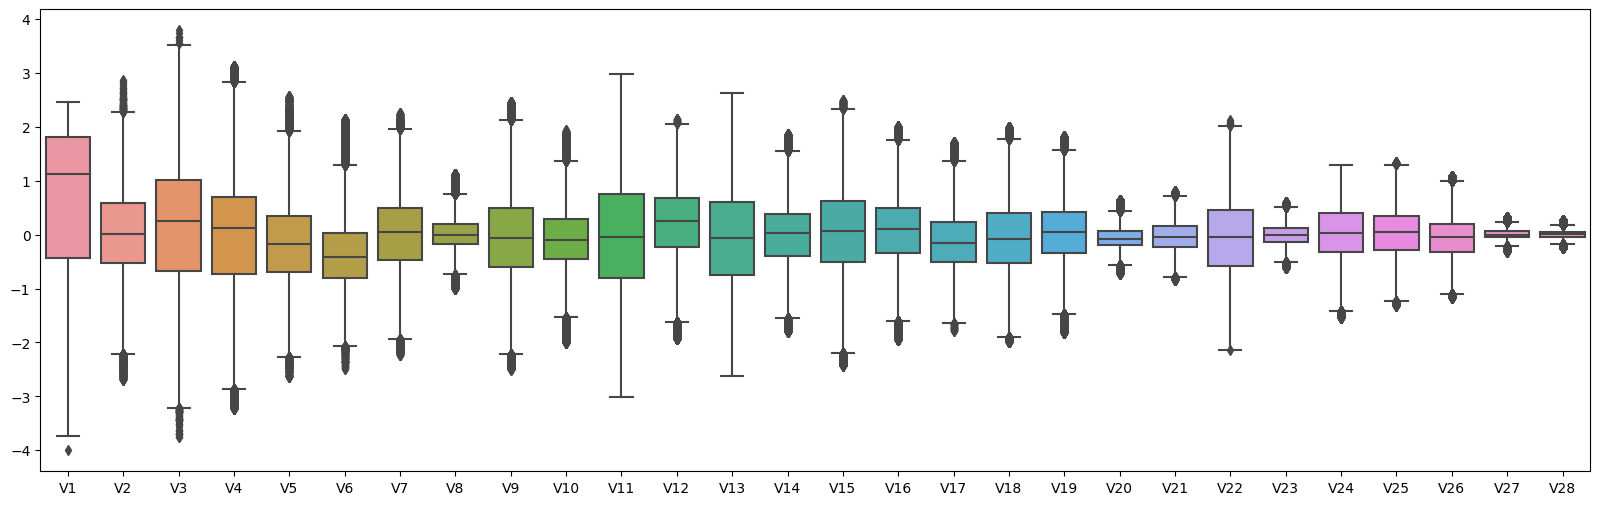

In [108]:
# 이상치 제거 후 그래프
plt.figure(figsize = (20,6))
sns.boxplot(IQR_df.loc[:,["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
                        "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
                        "V21","V22","V23","V24","V25","V26","V27","V28"]])

## Amount

<Axes: >

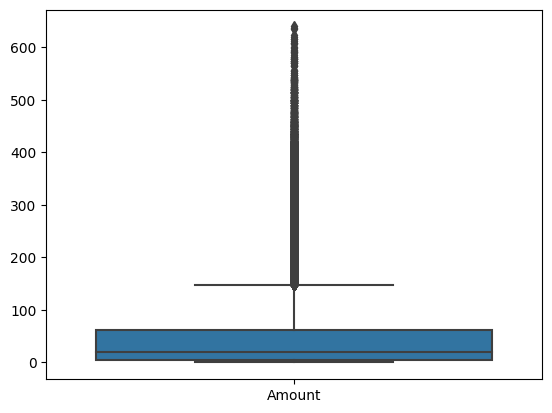

In [109]:
sns.boxplot(IQR_df.loc[:,["Amount"]])

In [110]:
# 이상치 개수 확인
print("이상치 개수", outlier_iqr(IQR_df,'Amount'), "/", "이상치 비율", str(outlier_iqr(IQR_df,'Amount')/len(IQR_df)*100)+"%")

이상치 개수 14613 / 이상치 비율 9.358309317963496%


In [111]:
# IQR
Q1 = IQR_df['Amount'].quantile(q=0.25)
Q3 = IQR_df['Amount'].quantile(q=0.75)
IQR = Q3-Q1
IQR

57.04

In [112]:
# 이상치 제거
credit = IQR_df[(IQR_df['Amount'] <= Q3+1.5*IQR) & (IQR_df['Amount'] >= Q1-1.5*IQR)]

<Axes: >

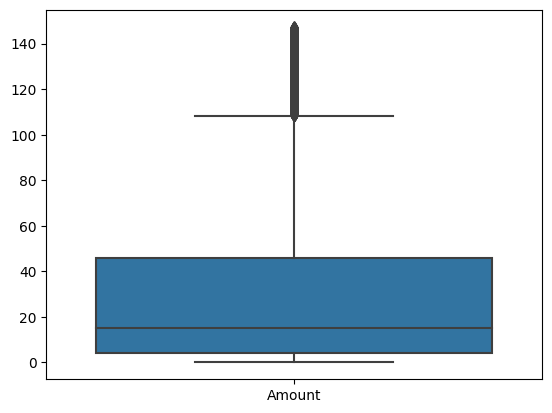

In [113]:
# 이상치 제거 후 그래프 그리기
sns.boxplot(credit.loc[:,["Amount"]])

<Axes: >

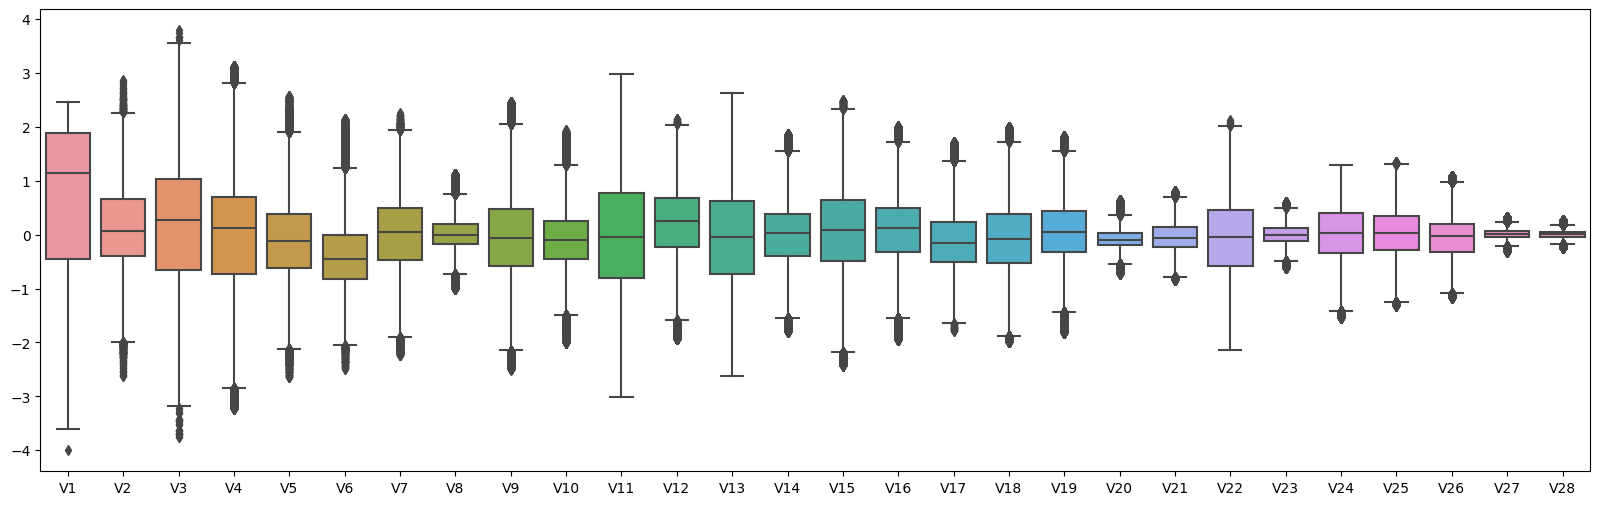

In [114]:
plt.figure(figsize = (20,6))
sns.boxplot(credit.loc[:,["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
                        "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
                        "V21","V22","V23","V24","V25","V26","V27","V28"]])

In [115]:
credit.reset_index(inplace = True)
credit.drop(['Time','index'], axis = 1, inplace = True)

<ipython-input-115-2d2003a2f48d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.drop(['Time','index'], axis = 1, inplace = True)


# 데이터 분리

In [116]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(credit.drop("Class", axis = 1),
                                                    credit['Class'], test_size = 0.3, random_state= 156)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99075, 29) (42462, 29) (99075,) (42462,)


## standardscaler

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# hyperparameter
hyperparams = {
    'max_depth': [2, 3,4,5,6],
    'min_samples_split': [2, 3,4,5,6],
    'splitter' : ['best', 'random'],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_leaf_nodes' : [4,5,6,7,8,9],
}

# gridsearchcv
dtc = DecisionTreeClassifier()
grid_tree = GridSearchCV(dtc, param_grid=hyperparams, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']})

# 결과 확인, 정확도

In [120]:
print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
print(grid_tree.best_estimator_)

# 정확도
em = grid_tree.best_estimator_
pred = em.predict(X_test)
print(accuracy_score(y_test, pred))

best parameters :  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
best score :  0.9998687862730256
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4,
                       min_weight_fraction_leaf=0.1)
0.9999528990626914


# 결과 시각화

In [121]:
dt_clf = DecisionTreeClassifier(max_depth = 2,
                                max_leaf_nodes = 4,
                                min_samples_split = 2, min_weight_fraction_leaf = 0.1,
                                splitter = 'best').fit(X_train, y_train)

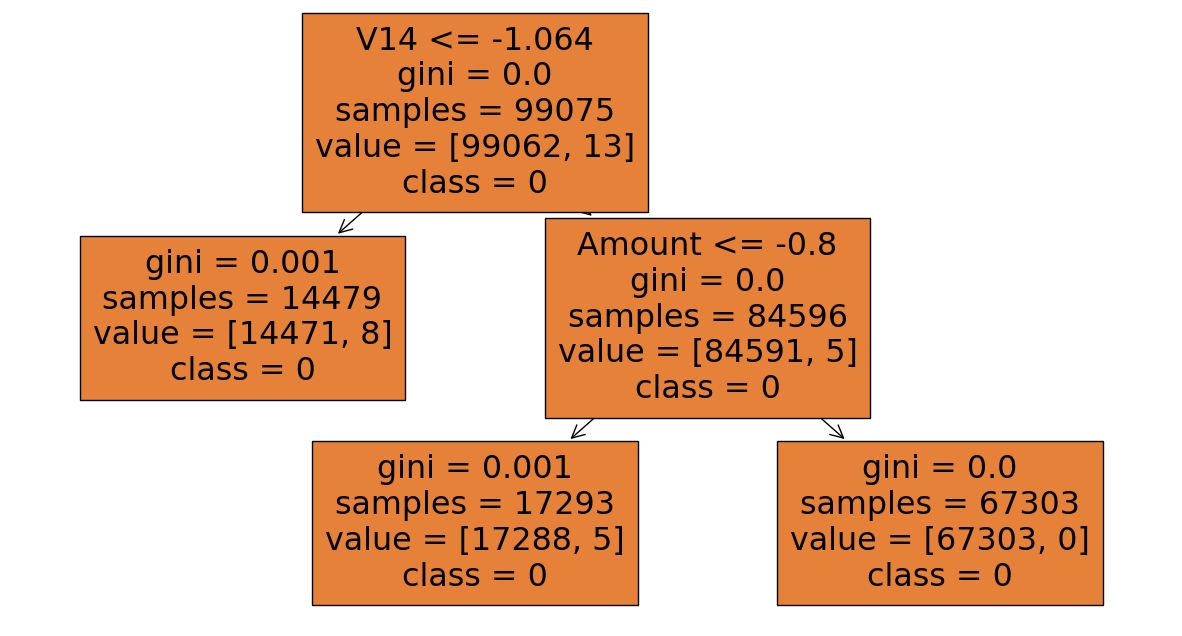

In [130]:
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = list(credit.columns.drop("Class")),
                 class_names=["0","1"],
                 filled=True)